In [21]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state = 5)

In [22]:
# numpy to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape

In [23]:
n_samples

100

In [24]:
n_features

1

In [25]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size , output_size)

In [28]:
# 2) Loss and optimizer
learning_rate = 0.1
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters() ,lr = learning_rate)

epoch: 10, loss = 449.0778
epoch: 20, loss = 445.9682
epoch: 30, loss = 445.8881
epoch: 40, loss = 445.8859
epoch: 50, loss = 445.8859
epoch: 60, loss = 445.8859
epoch: 70, loss = 445.8859
epoch: 80, loss = 445.8859
epoch: 90, loss = 445.8859
epoch: 100, loss = 445.8859


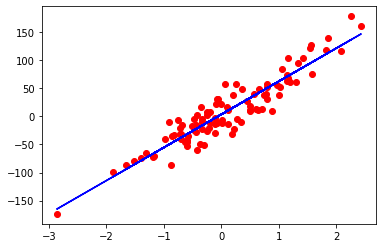

In [29]:
# 3) Training loop

num_epochs = 100
for epoch in range(num_epochs):
    # forward 
    y_predict = model(X) # 資料整包進去，未切batch
    # loss
    loss = criterion(y_predict,y)
    # back_ward and update
    loss.backward()
    optimizer.step()
    # zero grad
    optimizer.zero_grad()
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()